In [17]:
%run "../Notebooks/initialization.ipynb"
%run "../Notebooks/Input_selection_functions.ipynb"
%run "../Notebooks/Stitching_clean.ipynb"
%run "../Notebooks/Visualization_functions.ipynb"
%run "../Notebooks/Downsampling_and_outliers_functions.ipynb"
%load_ext autoreload

loading directory file
----------------------------------------
loaded variables from initialization file: 
> myparams, myconfiguration_file
> list_picked_id_source, list_picked_id_target
> data_folder
----------------------------------------
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
#load point cloud
complete_cluster= o3d.io.read_point_cloud("complete_cluster_3.pcd")
custom_draw_geometry(complete_cluster,
                     mytitle = "complete_cluster",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = "interactive")

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


In [3]:
pcd= o3d.io.read_point_cloud("cluster_two_sides_cluster.pcd")

In [19]:

custom_draw_geometry(complete_cluster,
                     mytitle = "complete",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = True)

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


Here there are various reconstruction experiments.

The best option to get to a mesh appearing qualitatively good, seems to be alpha meshing followed by simple filtering or Laplacian filtering

## alpha mesh

In [24]:
alpha = 0.2
print(f"alpha={alpha:.3f}")
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(complete_cluster, alpha)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)

alpha=0.200


KeyboardInterrupt: 

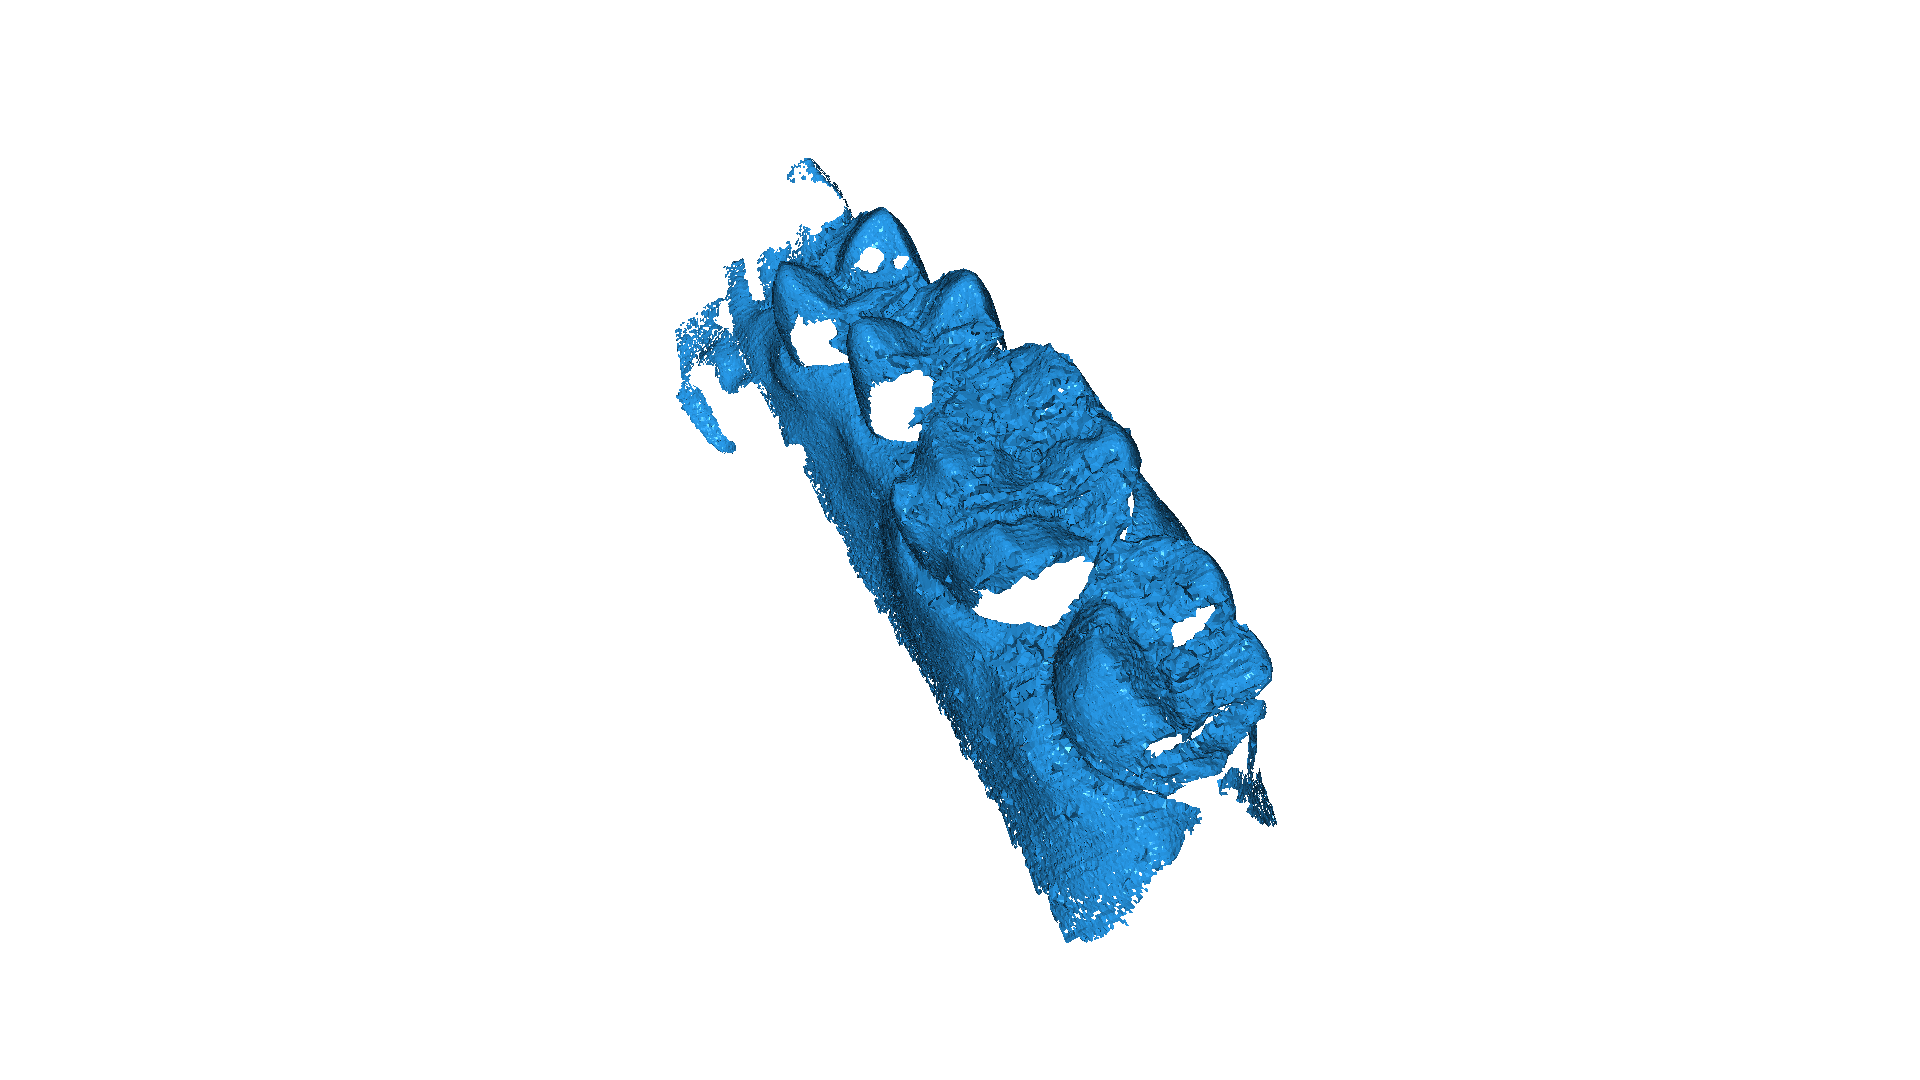

In [15]:
newest = last_file_containing("Screen", extension = '.png')
Im(filename=newest,width = 800) 

## ball pivoting

In [22]:
radii = [0.05, 0.01, 0.02, 0.04]
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    complete_cluster, o3d.utility.DoubleVector(radii))
o3d.visualization.draw_geometries([rec_mesh], mesh_show_back_face=True)

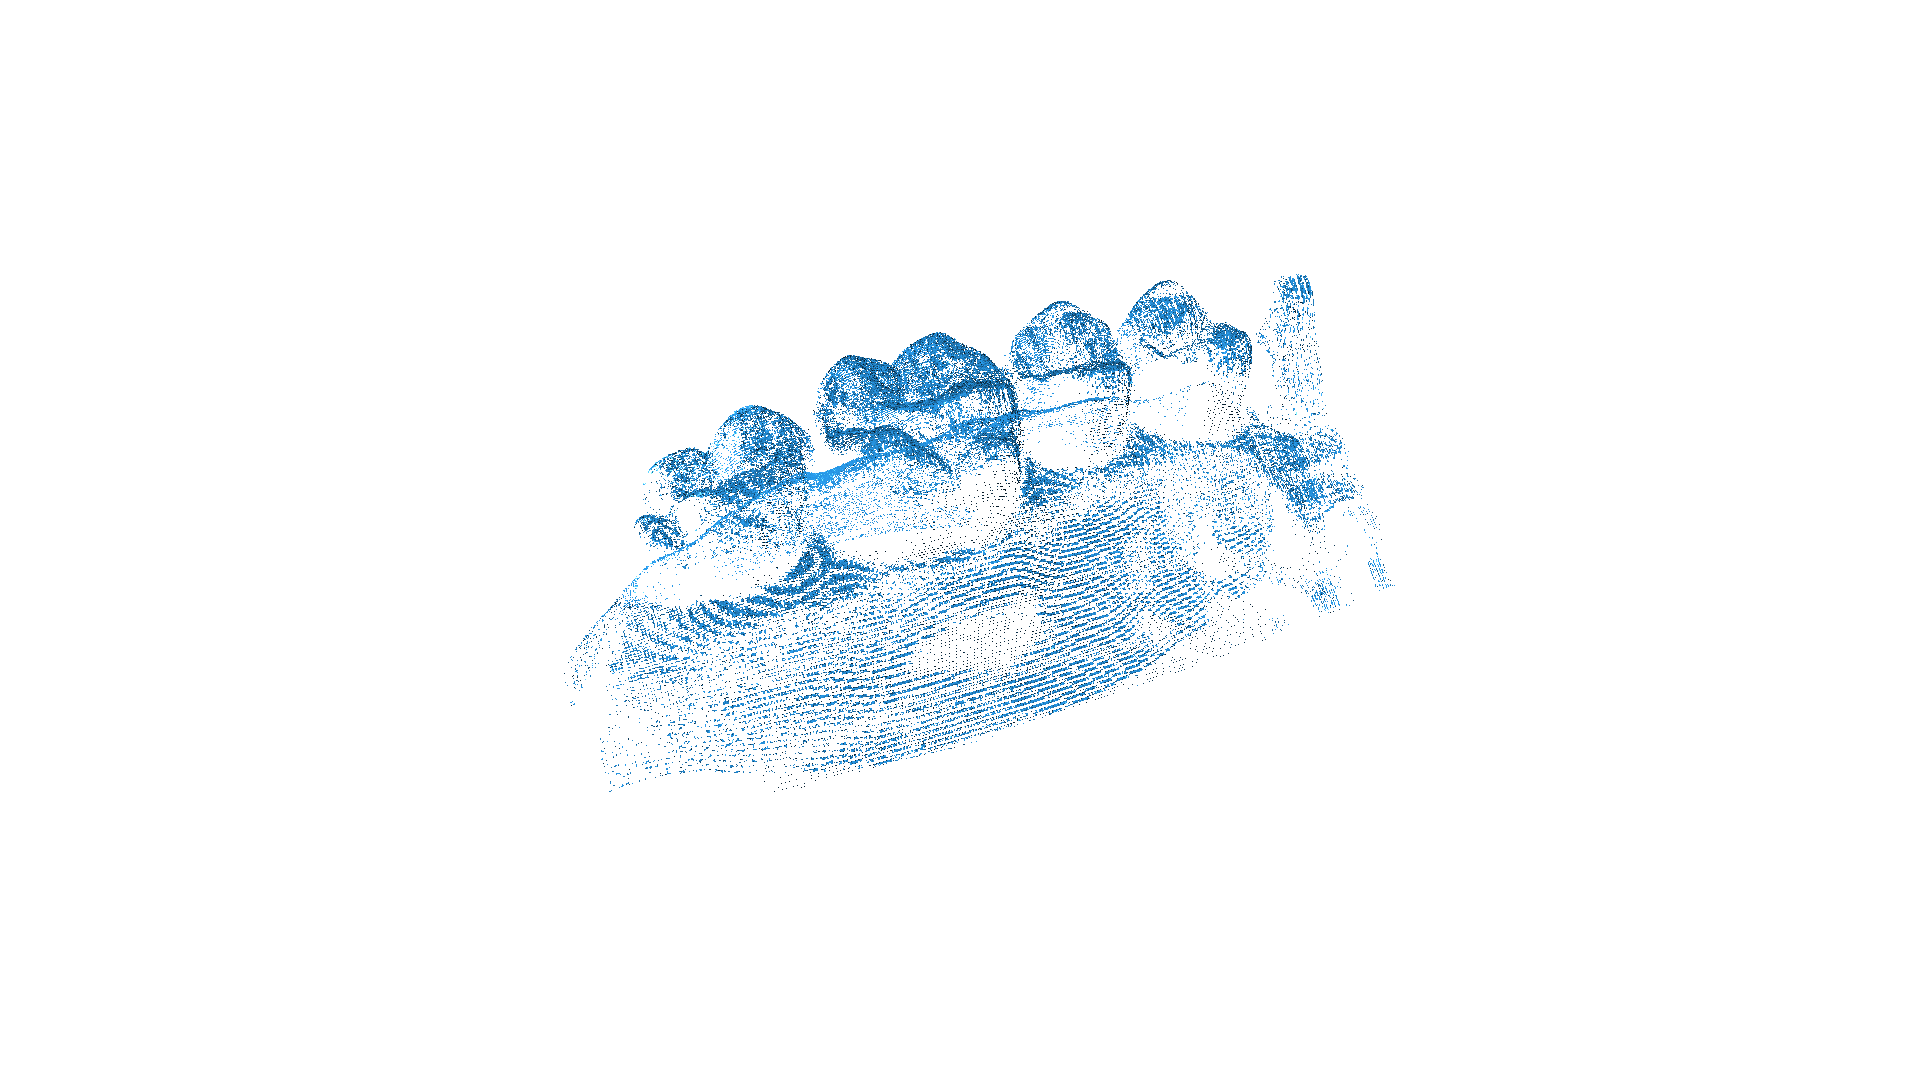

In [23]:
newest = last_file_containing("Screen", extension = '.png')
Im(filename=newest,width = 600) 

## Poisson

In [37]:
print('run Poisson surface reconstruction')
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(
        pcd, depth=10)
print(mesh)
o3d.visualization.draw_geometries([pcd,mesh], mesh_show_back_face=True)

run Poisson surface reconstruction
[Open3D DEBUG] Input Points / Samples: 488502 / 356274
[Open3D DEBUG] #   Got kernel density: 0.1956 (s), 646.461 (MB) / 1009.36 (MB) / 1534 (MB)
[Open3D DEBUG] #     Got normal field: 1.27451 (s), 767.77 (MB) / 1009.36 (MB) / 1534 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 2.412228e-06 / 1.178378e+00
[Open3D DEBUG] #       Finalized tree: 0.983235 (s), 970.961 (MB) / 1009.36 (MB) / 1534 (MB)
[Open3D DEBUG] #  Set FEM constraints: 1.56313 (s), 1015.42 (MB) / 1015.42 (MB) / 1534 (MB)
[Open3D DEBUG] #Set point constraints: 0.286395 (s), 987.914 (MB) / 1015.42 (MB) / 1534 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 5065145 / 5451904 / 336833
[Open3D DEBUG] Memory Usage: 987.918 MB
[Open3D DEBUG] # Linear system solved: 3.67627 (s), 988.215 (MB) / 1015.42 (MB) / 1534 (MB)
[Open3D DEBUG] Got average: 0.0791719 (s), 861.887 (MB) / 1015.42 (MB) / 1534 (MB)
[Open3D DEBUG] Iso-Value: 4.994245e-01 = 2.439699e+05 / 4.885020e+05
[Open3D D

In [38]:
print('visualize densities')
densities = np.asarray(densities)
density_colors = plt.get_cmap('plasma')(
    (densities - densities.min()) / (densities.max() - densities.min()))
density_colors = density_colors[:, :3]
density_mesh = o3d.geometry.TriangleMesh()
density_mesh.vertices = mesh.vertices
density_mesh.triangles = mesh.triangles
density_mesh.triangle_normals = mesh.triangle_normals
density_mesh.vertex_colors = o3d.utility.Vector3dVector(density_colors)
o3d.visualization.draw_geometries([pcd,density_mesh], mesh_show_back_face=True)

visualize densities


In [39]:
print('remove low density vertices')
vertices_to_remove = densities < np.quantile(densities, 0.01)
mesh.remove_vertices_by_mask(vertices_to_remove)
print(mesh)
o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)

remove low density vertices
TriangleMesh with 1007625 points and 2013407 triangles.


In [35]:
o3d.visualization.draw_geometries([pcd,mesh], mesh_show_back_face=True)

In [ ]:
custom_draw_geometry([pcd,density_mesh],
                     mytitle = "complete",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = True)

In [ ]:
## surface normal estimation 
print("Computing normal and rendering it.")
mesh.compute_vertex_normals()
print(np.asarray(mesh.triangle_normals))
o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)

## filters

In [70]:
#this looks like the best
mesh_in = mesh
number_of_iterations = 5
print('filter with average with 1 iteration')
mesh_out = mesh_in.filter_smooth_simple(number_of_iterations=number_of_iterations)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out], mesh_show_back_face=True)


filter with average with 1 iteration


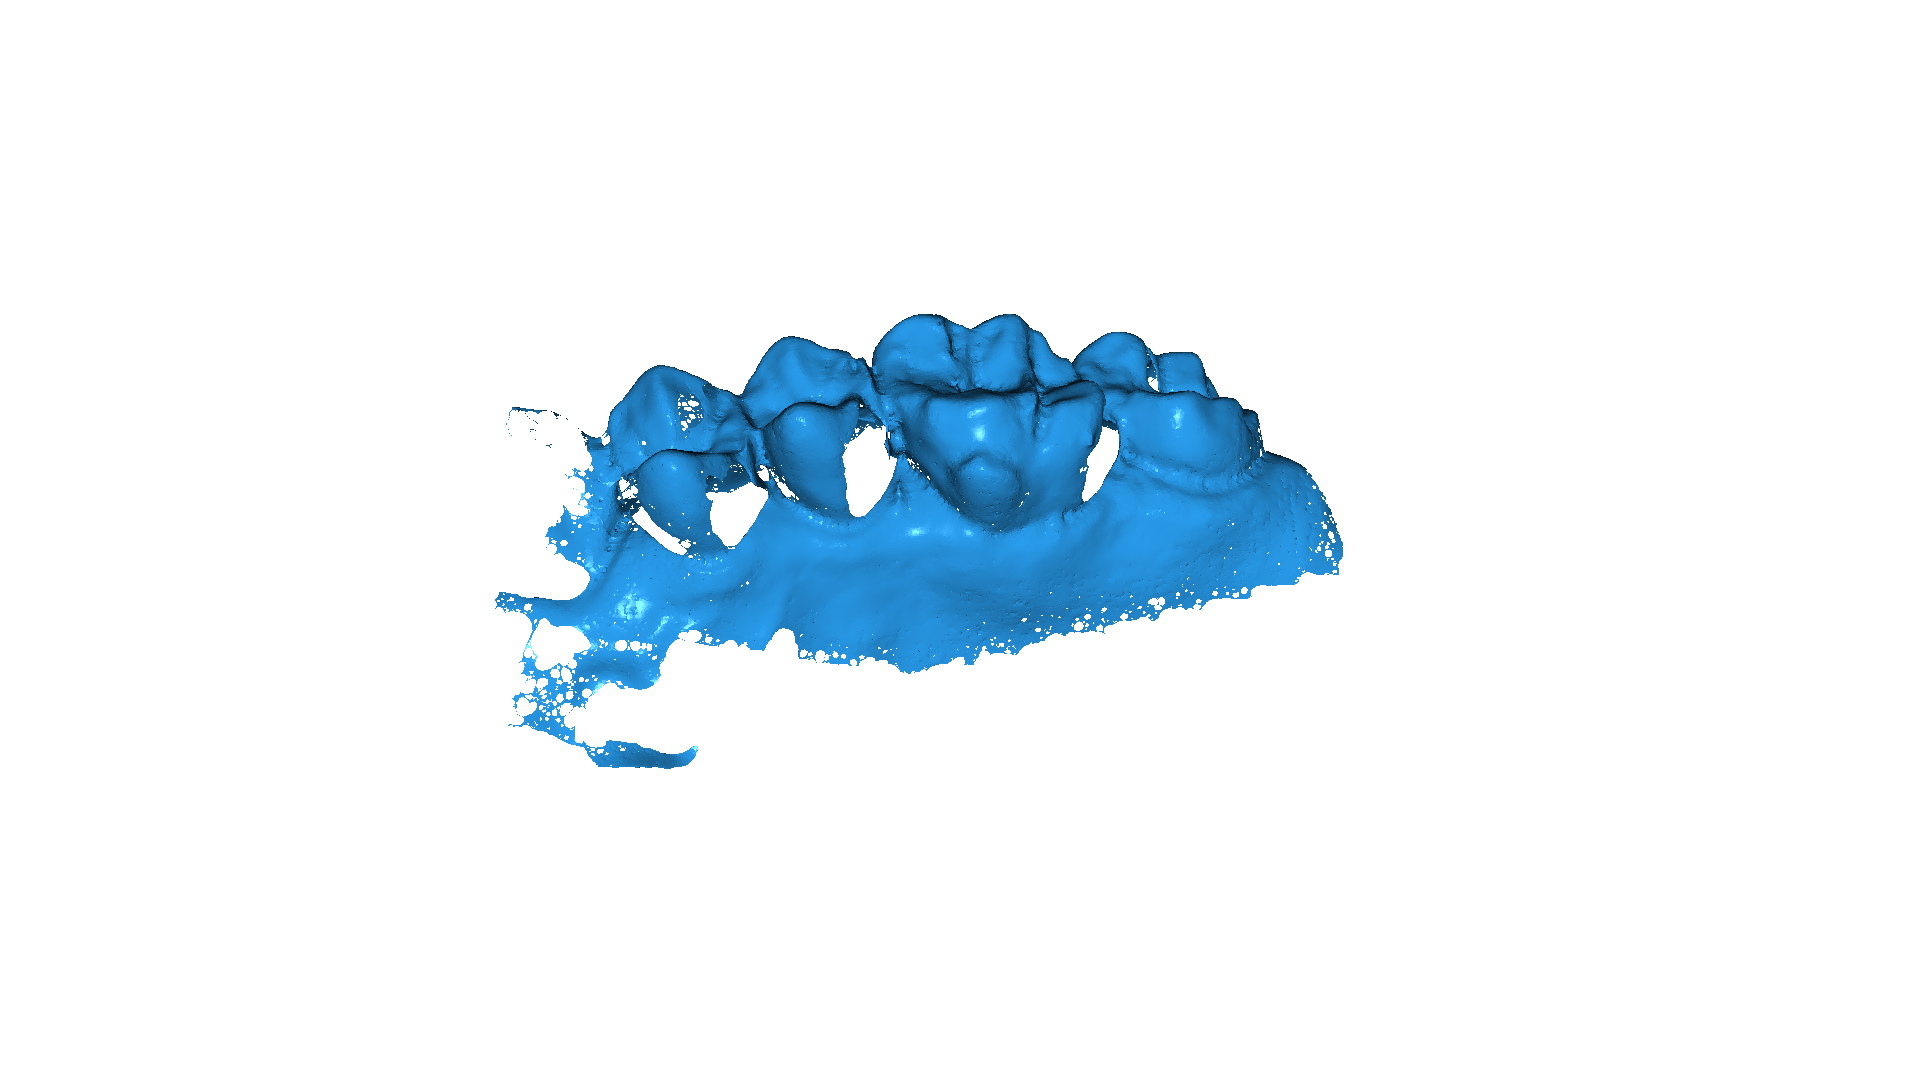

In [66]:
newest = last_file_containing("Screen", extension = '.png')
Im(filename=newest,width = 600) 

In [71]:
demo_crop_geometry(mesh_out)

Demo for manual geometry cropping
1) Press 'Y' twice to align geometry with negative direction of y-axis
2) Press 'K' to lock screen and to switch to selection mode
3) Drag for rectangle selection,
   or use ctrl + left click for polygon selection
4) Press 'C' to get a selected geometry and to save it
5) Press 'F' to switch to freeview mode
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.


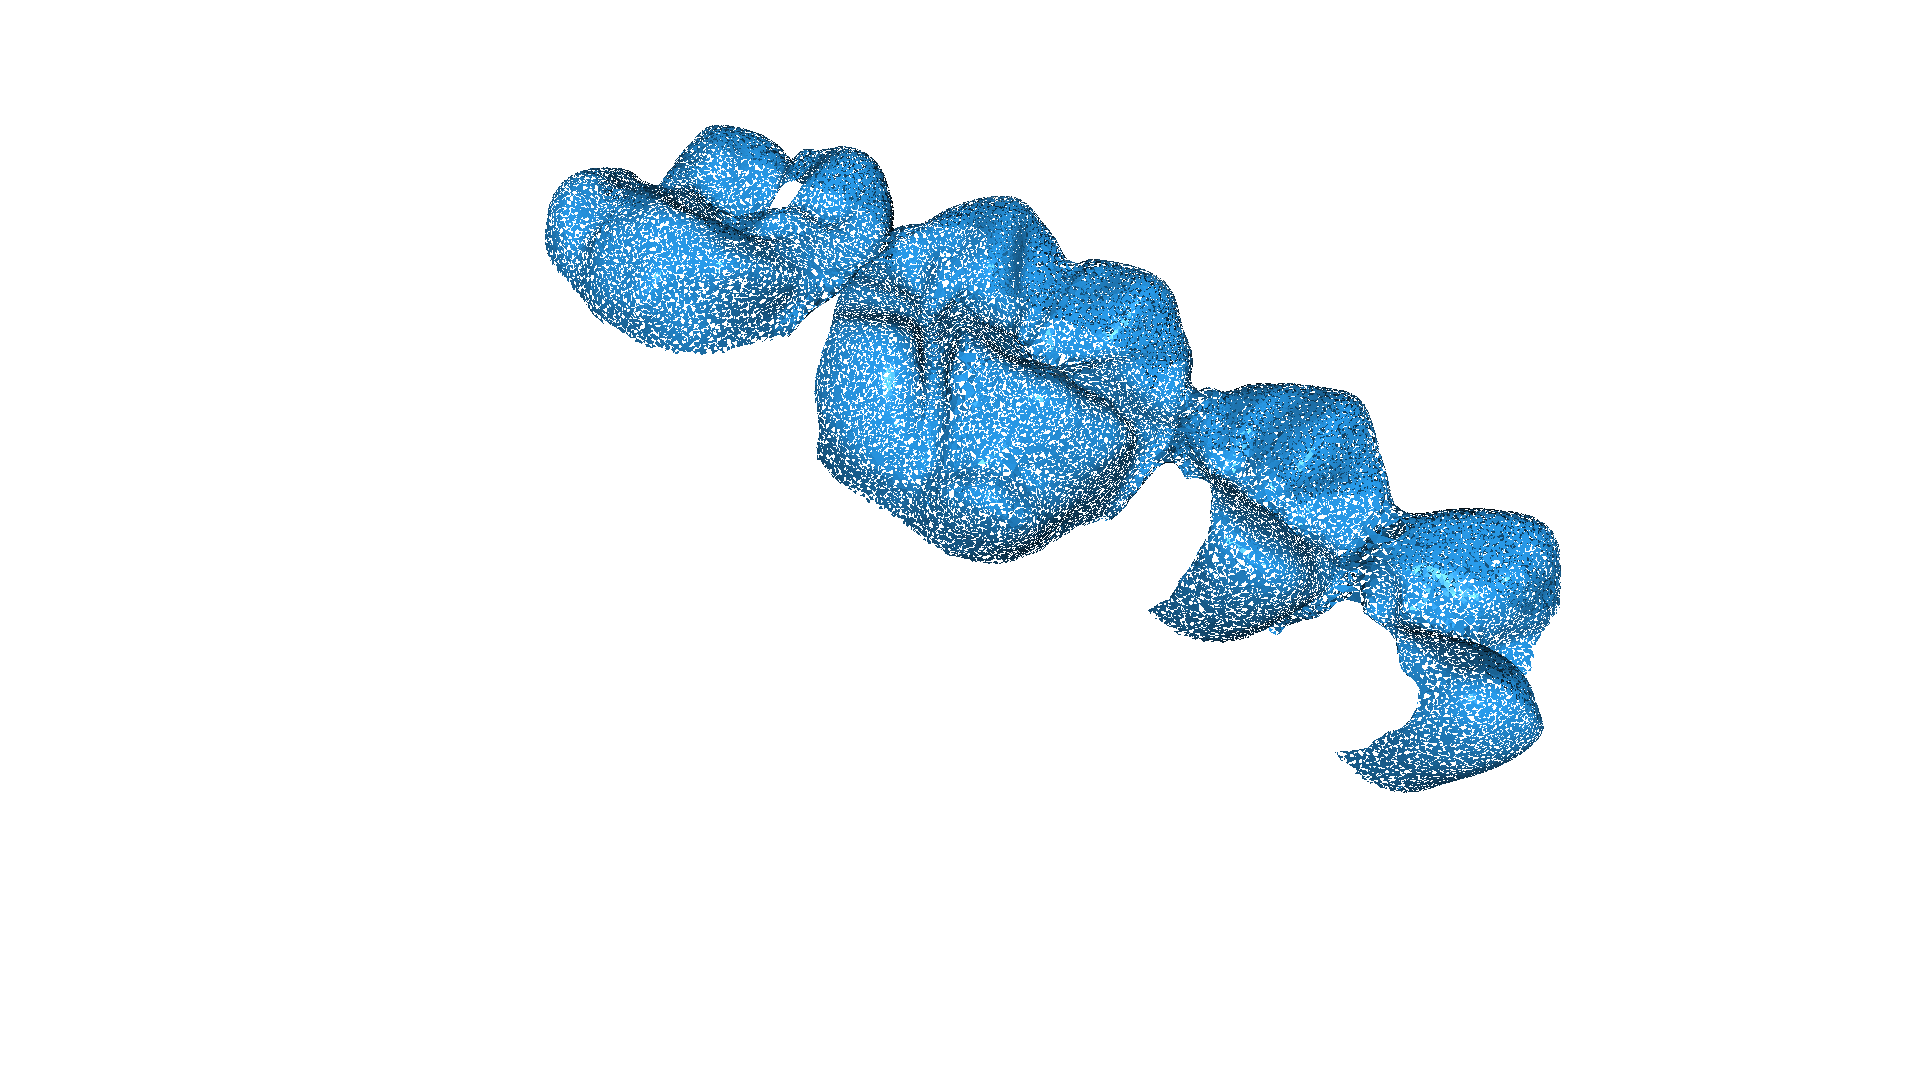

In [72]:
newest = last_file_containing("Screen", extension = '.png')
Im(filename=newest,width = 600) 

In [ ]:
# load the cropped pointcloud


In [ ]:
# how to convert mesh to pointCloud
pcd = o3d.geometry.PointCloud()
pcd.points = mesh_out.vertices
pcd.colors = mesh_out.vertex_colors
pcd.normals = mesh_out.vertex_normals

In [ ]:
#save
o3d.io.write_point_cloud(mytimestamp()+"complete_clus.pcd", pcd)

In [20]:
print('filter with Laplacian with 10 iterations')
mesh_out = mesh_in.filter_smooth_laplacian(number_of_iterations=10)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out],mesh_show_back_face=True)

print('filter with Laplacian with 50 iterations')
mesh_out = mesh_in.filter_smooth_laplacian(number_of_iterations=50)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out], mesh_show_back_face=True)

filter with Laplacian with 10 iterations
filter with Laplacian with 50 iterations


In [ ]:
print('filter with Taubin with 10 iterations')
mesh_out = mesh_in.filter_smooth_taubin(number_of_iterations=10)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

print('filter with Taubin with 100 iterations')
mesh_out = mesh_in.filter_smooth_taubin(number_of_iterations=100)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

## show structure of the mesh

In [ ]:
mesh = mesh_out
mesh.compute_vertex_normals()
print(    f'The mesh has {len(mesh.vertices)} vertices and {len(mesh.triangles)} triangles' )

o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True)
mesh = mesh.subdivide_loop(number_of_iterations=1)
print(  f'After subdivision it has {len(mesh.vertices)} vertices and {len(mesh.triangles)} triangles')
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True)

## connected components

In [ ]:
print("connected components")
vert = np.asarray(mesh.vertices)
min_vert, max_vert = vert.min(axis=0), vert.max(axis=0)
for _ in range(30):
    cube = o3d.geometry.TriangleMesh.create_box()
    cube.scale(0.005, center=cube.get_center())
    cube.translate(
        (
            np.random.uniform(min_vert[0], max_vert[0]),
            np.random.uniform(min_vert[1], max_vert[1]),
            np.random.uniform(min_vert[2], max_vert[2]),
        ),
        relative=False,
    )
    mesh += cube
mesh.compute_vertex_normals()
print("Show input mesh")
o3d.visualization.draw_geometries([mesh])

In [ ]:
print("Cluster connected triangles")
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    triangle_clusters, cluster_n_triangles, cluster_area = (
        mesh.cluster_connected_triangles())
triangle_clusters = np.asarray(triangle_clusters)
cluster_n_triangles = np.asarray(cluster_n_triangles)
cluster_area = np.asarray(cluster_area)

In [ ]:
print("Show mesh with small clusters removed")
mesh_0 = copy.deepcopy(mesh)
triangles_to_remove = cluster_n_triangles[triangle_clusters] < 100
mesh_0.remove_triangles_by_mask(triangles_to_remove)
o3d.visualization.draw_geometries([mesh_0])